In [16]:
# biblioteki
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import numpy as np

ModuleNotFoundError: No module named 'keras.src'

In [13]:
images_folder_path = '/Users/milenabiernacka/Desktop/praca-magisterska/DF/DF20M'
data = pd.read_csv('merged_data.csv')
data.head()

,gbifID,eventDate,year,month,day,countryCode,locality,taxonID,scientificName,kingdom,...,level2Name,ImageUniqueID,Substrate,rightsHolder,Latitude,Longitude,CoorUncert,Habitat,image_path,poisonous
0,2862684394,2020-09-17T00:00:00,2020.0,9.0,17.0,DK,"Langesø, Morud",17215.0,Mycena crocata (Schrad.) P.Kumm.,Fungi,...,Nordfyns,2862684394-136762,dead wood (including bark),Uffe Nygaard,55.433810,10.200162,10.0,Unmanaged deciduous woodland,2862684394-136762.JPG,0
1,2238502117,2017-08-16T00:00:00,2017.0,8.0,16.0,DK,Virum,10057.0,Agaricus augustus Fr.,Fungi,...,Rudersdal,2238502117-320693,soil,Michael Hansen,55.800171,12.478571,5.0,garden,2238502117-320693.JPG,0
2,2818074328,2020-07-23T00:00:00,2020.0,7.0,23.0,DK,"Gribskov, Enghavehus",20027.0,Russula olivacea (Schaeff.) Fr.,Fungi,...,Hillerød,2818074328-59948,soil,Anna ploug,55.976322,12.293878,1.0,Mixed woodland (with coniferous and deciduous ...,2818074328-59948.JPG,0
3,2238560017,2018-09-09T00:00:00,2018.0,9.0,9.0,DK,Færgelunden,11069.0,Boletus edulis Bull.,Fungi,...,Frederikssund,2238560017-331396,soil,Henrik Dalgaard,55.840458,12.027228,15.0,Deciduous woodland,2238560017-331396.JPG,0
4,2237970493,2011-08-20T00:00:00,2011.0,8.0,20.0,DK,Tofte Skov,17278.0,Mycena pseudocorticola Kühner,Fungi,...,Aalborg,2237970493-5168,bark,David Boertmann,56.844840,10.192650,75.0,Forest bog,2237970493-5168.JPG,0


<Axes: xlabel='species'>

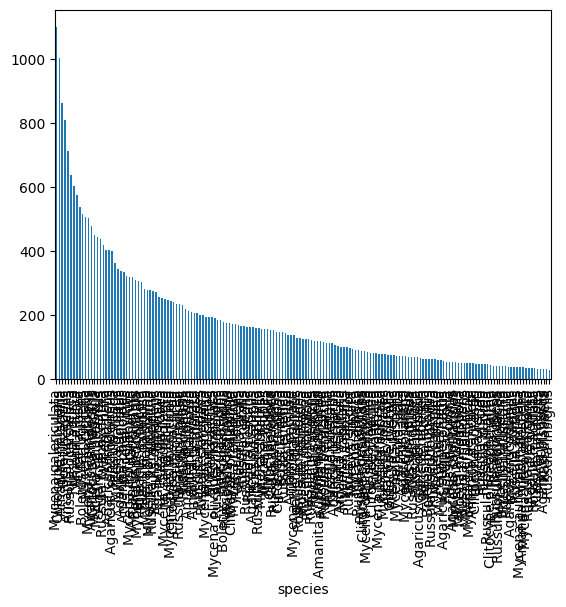

In [8]:
data['species'].value_counts().plot(kind='bar')

In [9]:
data['species'].value_counts()

species
Mycena galericulata    1099
Clitocybe nebularis    1003
Amanita muscaria        863
Boletus edulis          811
Amanita rubescens       713
                       ... 
Russula farinipes        33
Mycena rosella           33
Agaricus bisporus        33
Russula laeta            32
Russula insignis         28
Name: count, Length: 169, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i pozostałe dane (testowy + walidacyjny)
train_data, test_val_data = train_test_split(data, test_size=0.4, random_state=42, stratify = data['species'])

# Podział pozostałych danych na zbiór testowy i walidacyjny
test_data, val_data = train_test_split(test_val_data, test_size=0.5, random_state=42, stratify = test_val_data['species'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ścieżka do zdjęć - upewnij się, że jest poprawna
photos_path = '/Users/milenabiernacka/Desktop/praca-magisterska/DF/DF21_300'

# Utwórz generator obrazów z augmentacją danych dla zbioru treningowego
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Utwórz generator obrazów bez augmentacji danych dla zbioru walidacyjnego i testowego
datagen_test_val = ImageDataGenerator(
    rescale=1./255
)

# Przygotowanie generatorów
train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_data,
    directory=photos_path,
    x_col='full_image_path',
    y_col='species',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=64,
    shuffle=True
)

test_generator = datagen_test_val.flow_from_dataframe(
    dataframe=test_data,
    directory=photos_path,
    x_col='full_image_path',
    y_col='species',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False
)

val_generator = datagen_test_val.flow_from_dataframe(
    dataframe=val_data,
    directory=photos_path,
    x_col='full_image_path',
    y_col='species',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False
)


ModuleNotFoundError: No module named 'keras.src'